# Problem 1 - Digit Recognizer

### Imports

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
import tensorflow as tf 

import numpy as np
import matplotlib.pyplot as plt
import warnings, math

warnings.filterwarnings("ignore")

### The dataset

In [3]:
data = np.load('dataset.npz')
X = data['X']
y = data['y']

labels_dict = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: 'A',
    11: 'B',
    12: 'C',
    13: 'D',
    14: 'E',
    15: 'F',
    16: 'Empty'
}

### Splitting the dataset

In [4]:
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

### Visualizing data

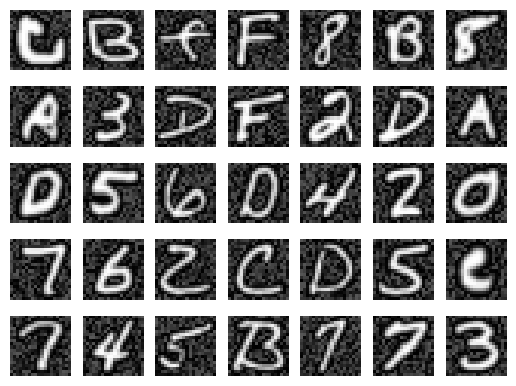

In [16]:
fig, axes = plt.subplots(5, 7)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
    ax.axis('off')
plt.show()

### Visualizing data by class

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(6, 6))
axes = axes.ravel()
np.random.seed(42)

for class_label in range(17):
    class_indices = np.where(y_train == class_label)[0]
    random_index = np.random.choice(class_indices)
    
    axes[class_label].imshow(X_train[random_index].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
    axes[class_label].axis('off')
    axes[class_label].set_title(labels_dict[class_label])
     
axes[-1].axis('off')
plt.tight_layout()
plt.show()

### Data Preprocessing

In [5]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_norm)
X_test = scaler.transform(X_test_norm)

### Model selection - Classifier 1

Here I use SVM

In [ ]:
param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_

y_pred_svc = best_svc.predict(X_test)
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred_svc)}")

### Model selection - Classifier 2

Here I use Random forest

In [19]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       188
           1       0.88      0.87      0.88        69
           2       0.94      0.59      0.73       158
           3       0.68      0.94      0.79       285
           4       0.77      0.77      0.77       150
           5       0.82      0.64      0.72       209
           6       0.82      0.92      0.86       274
           7       0.76      0.92      0.83       182
           8       0.75      0.57      0.65       128
           9       1.00      0.13      0.23        61
          10       0.69      0.96      0.80       248
          11       0.76      0.45      0.57       157
          12       0.75      0.96      0.84       285
          13       0.76      0.78      0.77       273
          14       0.00      0.00      0.00        22
          15       0.89  

### Model selection - Classifier 3

Here i use neaural network. Inspired by this article from medium [handwritten-digit-recognition](https://medium.com/@azkardm/handwritten-digit-recognition-4dc904edb515).

In [67]:

num_class = len(labels_dict)

# reshape data
X_train_tf = X_train.reshape(-1, 20, 20)
X_test_tf = X_test.reshape(-1, 20, 20)

# Add layers
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((20, 20, 1), input_shape=(20, 20)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_nn.fit(X_train_tf, y_train, epochs=10)

# Evaluate the model
loss, nn_accuracy = model_nn.evaluate(X_test_tf, y_test)

Epoch 1/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6565 - loss: 1.1609
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9326 - loss: 0.2221
Epoch 3/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.1356
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9787 - loss: 0.0688
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0438
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0309
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9928 - loss: 0.0237
Epoch 8/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0222
Epoch 9/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9954 - loss: 0.0200
Epoch 10/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0175
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9627 - loss: 0.1981


### Classifier Evaluation

In [69]:
svc_accuracy = accuracy_score(y_test, y_pred_svc)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Test Accuracy: {svc_accuracy:0.3f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:0.3f}")
print(f"Neural network Accuracy: {nn_accuracy:0.3f}\n")

accuracies = {
    'SVM': svc_accuracy,
    'Random Forest': rf_accuracy,
    'Neural Network': nn_accuracy
}
best_model_name = max(accuracies, key=accuracies.get)
if best_model_name == 'SVM':
    best_model = grid_rf
elif best_model_name == 'Random Forest':
    best_model = grid_svc
elif best_model_name == 'Neural Network':
    best_model = model_nn

print(f"Best model is {best_model_name} with accuracy: {accuracies[best_model_name] * 100:.2f}%")

SVM Test Accuracy: 0.920
Random Forest Test Accuracy: 0.777
Neural network Accuracy: 0.961

Best model is Neural Network with accuracy: 96.07%


### Vizulize the predicted data with confusion matrix
// Remove before delivering

How to read the table: 
- Take the value at row 0, column 0, which is 140. This means that for 140 instances, the true label was 0, and the classifier also predicted 0.
- Now, look at row 0, column 14, which is 30. This means that for 30 instances, the true label was 0, but the classifier incorrectly predicted label 14. 

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


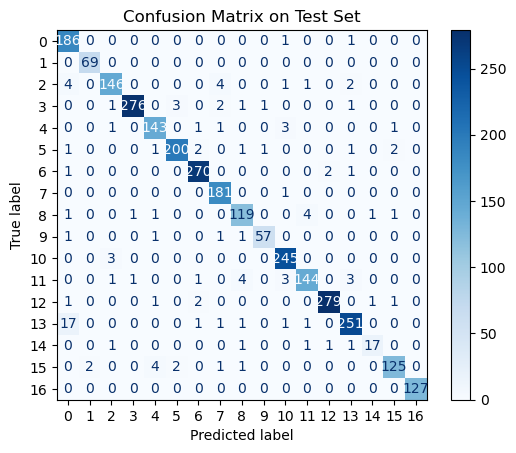

In [70]:
if isinstance(best_model, tf.keras.Model):
    X_test_nn = X_test_tf.reshape(-1, 20, 20, 1) 
    y_pred_probs = best_model.predict(X_test_nn)
    y_pred_test = np.argmax(y_pred_probs, axis=1)
else:
    y_pred_test = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.show()

### Testing the classifier agianst the unseen data

In [1]:
num_samples = 8
indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[indices]
sample_true_labels = y_test[indices]
sample_predicted_labels = y_pred_svc[indices]

fig, axes = plt.subplots(1, num_samples, figsize=(13, 4))  
for i in range(num_samples):
    ax = axes[i]
    ax.imshow(sample_images[i].reshape(20, 20), cmap='gray')
    ax.axis('off')

    actual = labels_dict[sample_true_labels[i]]
    predicted = labels_dict[sample_predicted_labels[i]]

    if actual == predicted:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(f"Actual: {actual}", fontsize=10)
    ax.text(0.5, -0.15, f"Predicted: {predicted}", fontsize=10, color=color, ha='center', va='top', transform=ax.transAxes)

plt.subplots_adjust(wspace=0.5) 

plt.show()

NameError: name 'np' is not defined

# Problem 2: Dimensionality Reduction

### Determine Optimal Number of Components

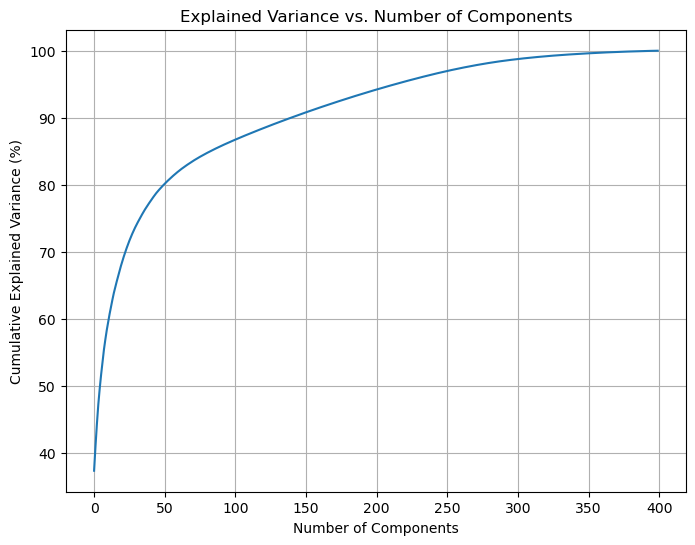

In [72]:
pca = PCA().fit(X_train)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

We can choose $k$ such that we retain, for example, 95% of the variance.

In [73]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {k}")

Number of components explaining 95% variance: 214


### Transform Data Using PCA

In [74]:
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Train Classifier on Reduced Data

In [75]:
model_pca = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(k,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])


model_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_pca.fit(X_train_pca, y_train, epochs=10)

Epoch 1/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.3427 - loss: 2.1442
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7701 - loss: 0.7368
Epoch 3/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8364 - loss: 0.5226
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.8722 - loss: 0.4065
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8940 - loss: 0.3211
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9057 - loss: 0.3007
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9207 - loss: 0.2308
Epoch 8/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9272 - loss: 0.2378
Epoch 9/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9465 - loss: 0.1668
Epoch 10/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.9476 - loss: 0.1526


### Evaluate performance

In [76]:
loss, accuracy_pca = model_pca.evaluate(X_test_pca, y_test)

print(f"Accuracy with PCA: {accuracy_pca * 100:.2f}%")
print(f"Accuracy without PCA: {nn_accuracy * 100:.2f}%")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.8952 - loss: 0.4064
Accuracy with PCA: 89.43%
Accuracy without PCA: 96.07%


# Problem 3: Detecting Out-of-Distribution Images

### The dataset

In [77]:
corrupted_data = np.load('corrupt_dataset.npz')
X_corrupted = corrupted_data['X']

### Visualisation of the corrupted data

We have normal data, but  it seem to inlcude images of clohtes like pants, sweater, dress too. 

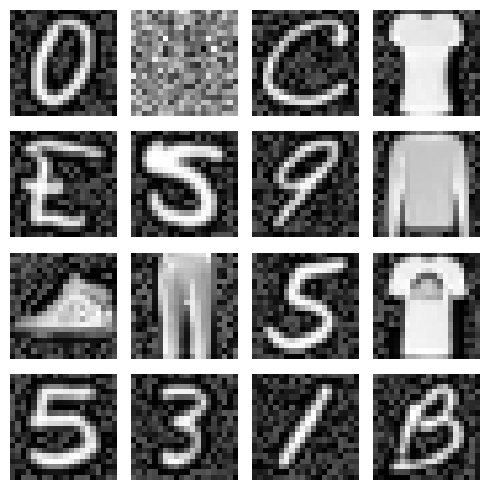

In [78]:
num_images = 16

plt.figure(figsize=(5, 5))
indices = np.random.choice(len(X_corrupted), num_images, replace=False)
for i, idx in enumerate(indices):
    image = X_corrupted[idx].reshape(20, 20)
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Using One-Class SVM to detect outliers

In [82]:
# TODO: Test with others like Isolation Forest,  Local Outlier Factor, ...
X_corrupted_scaled = scaler.transform(X_corrupted)

pca = PCA(n_components=k)
X_corrupted_pca = pca.fit_transform(X_corrupted_scaled)

ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.04)
ocsvm.fit(X_train_pca)

predictions = ocsvm.predict(X_corrupted_pca)

inlier_indices = np.where(predictions == 1)[0]
outlier_indices = np.where(predictions == -1)[0]

print(f"Number of inliers (numbers/letters): {len(inlier_indices)}")
print(f"Number of outliers (possibly clothes): {len(outlier_indices)}")

Number of inliers (numbers/letters): 870
Number of outliers (possibly clothes): 65


### Visualisation of the outliers

As you can see. It detected many of them. Pants, shoes, empty images, bags. But it also got some wrong.

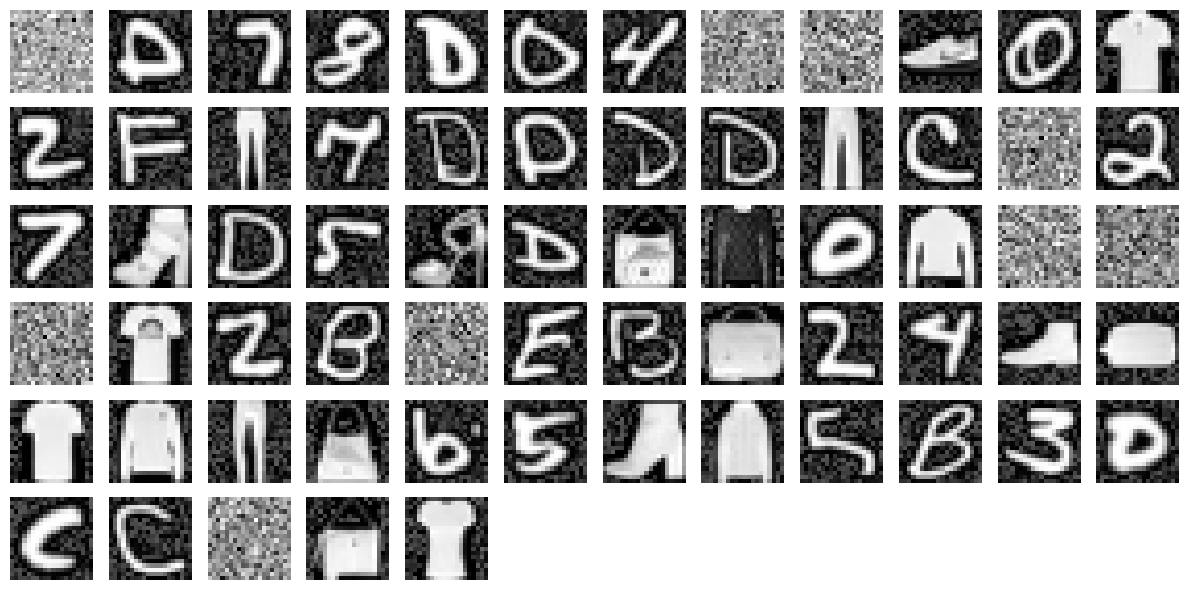

In [83]:
num_images = len(outlier_indices)
cols = 12
rows = math.ceil(num_images / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
axes = axes.flatten()
for i, idx in enumerate(outlier_indices):
    image = X_corrupted[idx].reshape(20, 20)
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

for i in range(len(outlier_indices), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()